## Data Analysis

<em>Aaron Wollman, Albin Joseph, Kelsey Richardson Blackwell, Will Huang</em>

In this notebook, the code will look at data from Spotify, Billboard, and the US Bureau of Labor Statistics to try to answer the following questions:
<ul>
    <li>Is there a correlation between unemployment and the Billboard Top 100 Songs Chart?  If so, can the data predict what the next top song might sound like?
    </li>
    <li>
        Are there other musical attributes besides happiness that have a stronger correlation such as danceability, energy, tempo, speech?
    </li>
</ul>

In [1]:
%matplotlib inline

In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import numpy as np
from scipy.stats import linregress
import scipy.stats as st

In [3]:
# Import the csv
music_unemployment = pd.read_csv('../data/music_and_unemployment.csv')
music_unemployment.drop('Unnamed: 0',axis=1,inplace=True)
music_unemployment.head()

,Track,Artist,Placement,Year,Month,Day,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,Unemployment Rate
0,El Paso,Marty Robbins,1,1960,1,4,0.654,0.452,2.0,-9.709,0.0300,0.835,0.160,0.691,106.662,5.2
1,Why,Frankie Avalon,2,1960,1,4,0.510,0.349,5.0,-8.677,0.0264,0.762,0.130,0.586,94.267,5.2
2,The Big Hurt,Miss Toni Fisher,3,1960,1,4,0.624,0.557,0.0,-8.309,0.0299,0.783,0.173,0.676,123.919,5.2
3,Running Bear,Johnny Preston,4,1960,1,4,0.772,0.297,5.0,-14.679,0.0530,0.854,0.125,0.822,119.987,5.2
4,Heartaches By The Number,Guy Mitchell,6,1960,1,4,0.584,0.589,5.0,-11.203,0.0718,0.463,0.069,0.842,172.484,5.2


## Unemployment Rate

Before we jumped into running recressions and statistical tests, we wanted to understand the in the unemployment rate during the timeframe. We wanted to visually understand the changes, so we created a heat map.

In [4]:
from columns import Music_Unemploy_Cols, Unemploy_Cols
from datafiles import music_unemployment, unemployment

In [5]:
# Import Music and Unemployment CSV
music_unemployment = pd.read_csv(music_unemployment, index_col = 0)
music_unemployment.head()

,Track,Artist,Placement,Year,Month,Day,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,Unemployment Rate
0,El Paso,Marty Robbins,1,1960,1,4,0.654,0.452,2.0,-9.709,0.0300,0.835,0.160,0.691,106.662,5.2
1,Why,Frankie Avalon,2,1960,1,4,0.510,0.349,5.0,-8.677,0.0264,0.762,0.130,0.586,94.267,5.2
2,The Big Hurt,Miss Toni Fisher,3,1960,1,4,0.624,0.557,0.0,-8.309,0.0299,0.783,0.173,0.676,123.919,5.2
3,Running Bear,Johnny Preston,4,1960,1,4,0.772,0.297,5.0,-14.679,0.0530,0.854,0.125,0.822,119.987,5.2
4,Heartaches By The Number,Guy Mitchell,6,1960,1,4,0.584,0.589,5.0,-11.203,0.0718,0.463,0.069,0.842,172.484,5.2


In [6]:
unemployement_time = pd.read_csv(unemployment, index_col = 0)
unemployement_time = unemployement_time.dropna()
unemployement_time.head()

,Year,Month,Unemployment Rate
0,1960,1,5.2
1,1960,2,4.8
2,1960,3,5.4
3,1960,4,5.2
4,1960,5,5.1


In [7]:
unemployement_time.dtypes

Year                   int64
Month                  int64
Unemployment Rate    float64
dtype: object

In [8]:
unemployement_time_pivot=unemployement_time.pivot(
    Unemploy_Cols.year, Unemploy_Cols.month, Unemploy_Cols.rate)
unemployement_time_pivot.dropna()
unemployement_time_pivot.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1960,5.2,4.8,5.4,5.2,5.1,5.4,5.5,5.6,5.5,6.1,6.1,6.6
1961,6.6,6.9,6.9,7.0,7.1,6.9,7.0,6.6,6.7,6.5,6.1,6.0
1962,5.8,5.5,5.6,5.6,5.5,5.5,5.4,5.7,5.6,5.4,5.7,5.5
1963,5.7,5.9,5.7,5.7,5.9,5.6,5.6,5.4,5.5,5.5,5.7,5.5
1964,5.6,5.4,5.4,5.3,5.1,5.2,4.9,5.0,5.1,5.1,4.8,5.0


In [9]:
# Display the Standard Deviation per Year
temp=unemployement_time_pivot.copy()
temp['STD']=[statistics.stdev(temp.loc[index,:]) for index,row in temp.iterrows()]
temp.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12,STD
Year,,,,,,,,,,,,,
1960,5.2,4.8,5.4,5.2,5.1,5.4,5.5,5.6,5.5,6.1,6.1,6.6,0.501739
1961,6.6,6.9,6.9,7.0,7.1,6.9,7.0,6.6,6.7,6.5,6.1,6.0,0.352803
1962,5.8,5.5,5.6,5.6,5.5,5.5,5.4,5.7,5.6,5.4,5.7,5.5,0.123091
1963,5.7,5.9,5.7,5.7,5.9,5.6,5.6,5.4,5.5,5.5,5.7,5.5,0.156428
1964,5.6,5.4,5.4,5.3,5.1,5.2,4.9,5.0,5.1,5.1,4.8,5.0,0.231432


To show the how the unemployment rate has changed over time, the code will use a heatmap. The darker the shade of blue, the higher the unemployment rate.

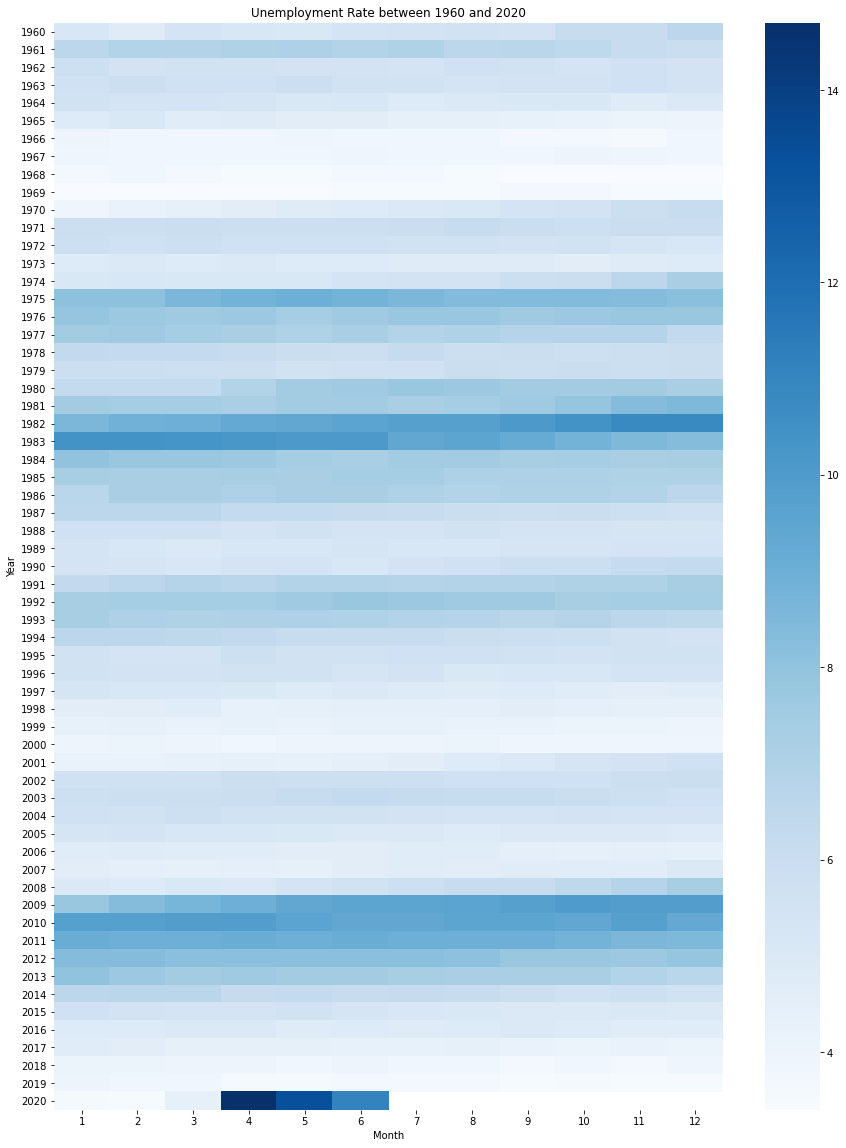

In [10]:
# Show all years in one heatmap.
plt.figure(figsize=(15,20))
sns.heatmap(unemployement_time_pivot,cmap=("Blues"))
plt.title("Unemployment Rate between 1960 and 2020")
plt.show()

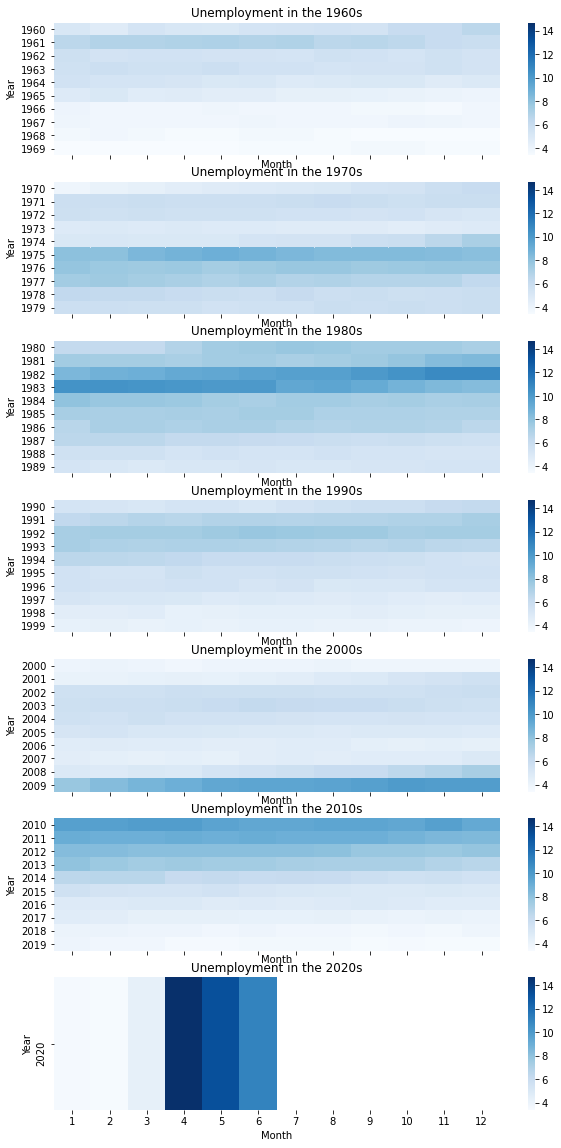

In [11]:
# Show the heatmap per decade.  Should be equivalent to the above graph.
vmax=unemployement_time_pivot.max().max()
vmin=unemployement_time_pivot.min().min()
fig,axes=plt.subplots(7,1,figsize=(10,20),sharex=True)
i = 0
for axis in axes:
    data = unemployement_time_pivot[i*10 : (i+1) * 10]
    axis.set_title(f"Unemployment in the {1960 + (i*10)}s")
    sns.heatmap(data,cmap=("Blues"),ax=axis,vmax=vmax,vmin=vmin)
    i += 1

plt.show()

## Song Valence
[Spotify's API](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/) defines a song's valence as:
<blockquote>"A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)."</blockquote>

For this project, this can be considered our \"happiness\" metric.

## Song Valence vs Unemployment
To compare the song's valence to the unemployment, the code will first try to find a correlation between each month's average valence and the unemployment rate.

In [12]:
# Define a function for plotting a regression
def regression_plot(dataframe, x_col, y_col):
    # Plot the scatter plot
    dataframe.plot(kind="scatter", x = x_col, y = y_col)
    
    # Calculate the correlation coefficient and linear regression model 
    x_values = dataframe[x_col]
    y_values = dataframe[y_col]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    eq_label = f"{equation} \nr-squared = {round(rvalue * rvalue, 3)}"
    regress_plot, = plt.plot(x_values, regress_values, "r-", label=eq_label)
    plt.legend(handles=[regress_plot], loc="best")

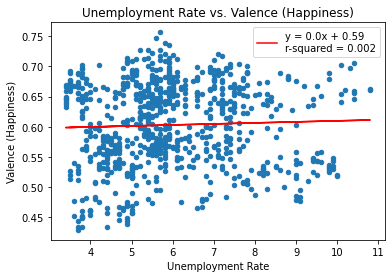

In [13]:
# Group by the song's date
date_cols = [Music_Unemploy_Cols.year, 
             Music_Unemploy_Cols.month, 
             Music_Unemploy_Cols.day]
music_unemployment_gb = music_unemployment.groupby(date_cols)

# Find the average of unemployment rate and weighed valence for each date
avg_music_unemploy = music_unemployment_gb.mean()
rate_v_valence = avg_music_unemploy[[Music_Unemploy_Cols.unemploy_rate, 
                                     Music_Unemploy_Cols.valence]]

# Create a Scatter Graph
regression_plot(rate_v_valence, 
                Music_Unemploy_Cols.unemploy_rate, 
                Music_Unemploy_Cols.valence)
plt.title("Unemployment Rate vs. Valence (Happiness)")
plt.xlabel("Unemployment Rate")
plt.ylabel("Valence (Happiness)")
plt.show()

From the above graph, there is <b>not</b> a good correlation between valence and the unemployment rate. With the above, the data doesn't take the song's placement in the Top 100 into account. Let's try again using a weighted average of the Top 100.

This weighted average will give the number 1 song 101 points, number 2 100 points, and will keep decreasing by 1 point until it assigns the number 100 song 1 point. By doing this weighted average, the placement of a song on the Top 100 will be more meaningful.

In [14]:
# Create a new data point "Weighted Valence"
Music_Unemploy_Cols.weighed_valence = "weighed valence"
weights = (101 - music_unemployment[Music_Unemploy_Cols.placement])
weighed_valence = music_unemployment[Music_Unemploy_Cols.valence] * weights
music_unemployment[Music_Unemploy_Cols.weighed_valence] = weighed_valence
music_unemployment.head()

,Track,Artist,Placement,Year,Month,Day,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,Unemployment Rate,weighed valence
0,El Paso,Marty Robbins,1,1960,1,4,0.654,0.452,2.0,-9.709,0.0300,0.835,0.160,0.691,106.662,5.2,69.100
1,Why,Frankie Avalon,2,1960,1,4,0.510,0.349,5.0,-8.677,0.0264,0.762,0.130,0.586,94.267,5.2,58.014
2,The Big Hurt,Miss Toni Fisher,3,1960,1,4,0.624,0.557,0.0,-8.309,0.0299,0.783,0.173,0.676,123.919,5.2,66.248
3,Running Bear,Johnny Preston,4,1960,1,4,0.772,0.297,5.0,-14.679,0.0530,0.854,0.125,0.822,119.987,5.2,79.734
4,Heartaches By The Number,Guy Mitchell,6,1960,1,4,0.584,0.589,5.0,-11.203,0.0718,0.463,0.069,0.842,172.484,5.2,79.990


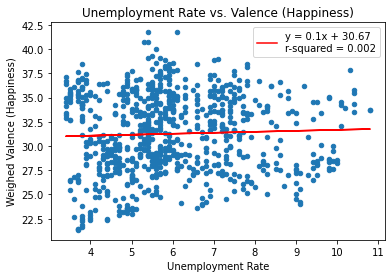

In [15]:
# Group by the song's date
music_unemployment_gb = music_unemployment.groupby(date_cols)

# Find the average of unemployment rate and weighed valence for each date
avg_music_unemploy = music_unemployment_gb.mean()
rate_v_valence = avg_music_unemploy[[Music_Unemploy_Cols.unemploy_rate, 
                                     Music_Unemploy_Cols.weighed_valence]]

# Create a Scatter Graph
regression_plot(rate_v_valence, 
                Music_Unemploy_Cols.unemploy_rate, 
                Music_Unemploy_Cols.weighed_valence)
plt.title("Unemployment Rate vs. Valence (Happiness)")
plt.xlabel("Unemployment Rate")
plt.ylabel("Weighed Valence (Happiness)")
plt.show()

Even with a weighted average, there still isn't a good correlation between the average valence and the unemployment rate. Let's now look to see if there is another musical attribute that might correlate to unemployment.

## Finding an Alternative Music Attribute

In [21]:
#Unemployment rate monthly data from 1960 to 2019 
unemployment_time=music_unemployment[['Year','Month','Unemployment Rate']].drop_duplicates().reset_index(drop=True)
unemployment_time.head()

,Year,Month,Unemployment Rate
0,1960,1,5.2
1,1960,2,4.8
2,1960,3,5.4
3,1960,4,5.2
4,1960,5,5.1


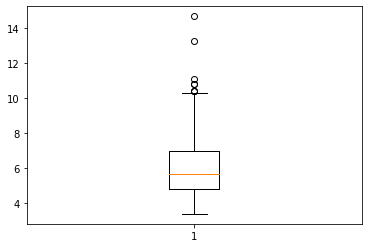

In [22]:
unemployment_rate_list=unemployement_time[Unemploy_Cols.rate]
plt.boxplot(unemployment_rate_list)
plt.show()

In [23]:
# End of Aaron's Code

In [24]:
# Kelsey's Code

## Valence "Happiness"

We also wanted to run a similar heat map for the valence score, so help us visually understand the changes in such a large timeframe.

Now it is time to do the work!

## Unemployment Rate vs. Valence "Happiness"

We ran a regression for valence versus unemployment rate. 

In [25]:
# Define regression function
def linearplt(dataframe, x_values, y_values, ylabel, coordinates):
    plt.scatter(x_values, y_values)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")

    plt.xlabel("Unemployment Rate")
    plt.ylabel(ylabel)

Weighed Valence


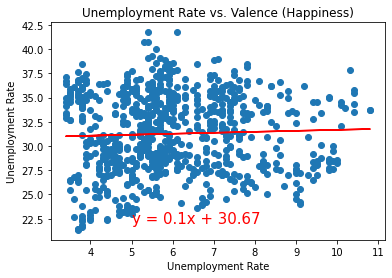

In [26]:
# Create a new data point "Weighted Valence"
music_unemployment["weighed valence"] = music_unemployment["valence"] * (101 - music_unemployment["Placement"])

# Group by the song's date
music_unemployment_gb = music_unemployment.groupby(["Year", "Month", "Day"])

# Find the average of unemployment rate and weighed valence for each date
rate_v_valence = music_unemployment_gb.mean()[["Unemployment Rate", "weighed valence"]]

# Create a Scatter Graph
x_values = rate_v_valence["Unemployment Rate"]
y_values = rate_v_valence["weighed valence"]
linearplt(rate_v_valence, x_values, y_values, "Unemployment Rate", (5,22))
plt.title("Unemployment Rate vs. Valence (Happiness)")
plt.show()

We decided to look at valence since 2010 to see if the past decade has been different since music has changed significanlty since 2010.

In [27]:
# Find the data for songs 2010 and after
music_unemployment_years = (music_unemployment.loc[(music_unemployment["Year"]) >= 2010])
music_unemployment_years

# Group by the song's date
music_unemployment_years_gb = music_unemployment_years.groupby(["Year", "Month", "Day"])

# Find the average of unemployment rate and weighed valence for each date
two_rate_v_valence = music_unemployment_years_gb.mean()[["Unemployment Rate", "weighed valence"]]

# Create a Scatter Graph
x_values = two_rate_v_valence["Unemployment Rate"]
y_values = two_rate_v_valence["weighed valence"]
linearplt(rate_v_tempo, x_values, y_values, "valence", (7,22))
plt.title("Unemployment Rate vs. Valence in Song 2010 and after")
plt.show()

NameError: name 'rate_v_tempo' is not defined

Conclusion: We discovered that the unemployment rate does not impact happiness in a Top 100 hit song. As you can see in the regression graph below, there was not a strong correlation. 

So we decided to run a statistical test next. 

In [28]:
# End Kelsey's Code

In [ ]:
# Will's Code

In [29]:
unemployment_rate_list=[]
for i in range(len(unemployment_time_pivot)):
    for j in unemployment_time_pivot.iloc[i,1:]:
        unemployment_rate_list.append(j)

{'whiskers': [<matplotlib.lines.Line2D at 0x152d9b45128>,
 'caps': [<matplotlib.lines.Line2D at 0x152d9b45828>,
 'boxes': [<matplotlib.lines.Line2D at 0x152d9b36dd8>],
 'medians': [<matplotlib.lines.Line2D at 0x152d9b45f28>],
 'fliers': [<matplotlib.lines.Line2D at 0x152d9b4f2e8>],
 'means': []}

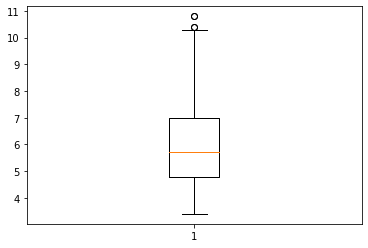

In [30]:
#check if there is outlier in unemployemnt rate
plt.boxplot(unemployment_rate_list)

In [31]:
#categorize song by its unemployment rate at the time
# if unemployment rate higher than 7.0, assign into High_Unemployment group
# 7.0 is descided by the 3rd quantile of all the unemployment rate data

high_unemployment_rate=np.quantile(unemployment_rate_list, .75) ###7.0
music_unemployment["weighed valence"] = music_unemployment["valence"] * (101 - music_unemployment["Placement"])
music_unemployment['High_Unemployment'] = music_unemployment['Unemployment Rate'].apply(lambda x: 1 if x>=high_unemployment_rate else 0)

music_unemployment.head()

,Track,Artist,Placement,Year,Month,Day,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,Unemployment Rate,weighed valence,High_Unemployment
0,El Paso,Marty Robbins,1,1960,1,4,0.654,0.452,2.0,-9.709,0.0300,0.835,0.160,0.691,106.662,5.2,69.100,0
1,Why,Frankie Avalon,2,1960,1,4,0.510,0.349,5.0,-8.677,0.0264,0.762,0.130,0.586,94.267,5.2,58.014,0
2,The Big Hurt,Miss Toni Fisher,3,1960,1,4,0.624,0.557,0.0,-8.309,0.0299,0.783,0.173,0.676,123.919,5.2,66.248,0
3,Running Bear,Johnny Preston,4,1960,1,4,0.772,0.297,5.0,-14.679,0.0530,0.854,0.125,0.822,119.987,5.2,79.734,0
4,Heartaches By The Number,Guy Mitchell,6,1960,1,4,0.584,0.589,5.0,-11.203,0.0718,0.463,0.069,0.842,172.484,5.2,79.990,0


In [32]:
#the calculation of weighted features could be done together 
#this section should be move above of top of the jupyter nobebook

music_unemployment["weighed valence"] = music_unemployment["valence"] * (101 - music_unemployment["Placement"])
music_unemployment['weighed danceability']=music_unemployment["danceability"] * (101 - music_unemployment["Placement"])
music_unemployment['weighed energy']=music_unemployment["energy"] * (101 - music_unemployment["Placement"])
music_unemployment['weighed key']=music_unemployment["key"] * (101 - music_unemployment["Placement"])
music_unemployment['weighed loudness']=music_unemployment["loudness"] * (101 - music_unemployment["Placement"])
music_unemployment['weighed speechiness']=music_unemployment["speechiness"] * (101 - music_unemployment["Placement"])
music_unemployment['weighed acousticness']=music_unemployment["acousticness"] * (101 - music_unemployment["Placement"])
music_unemployment['weighed liveness']=music_unemployment["liveness"] * (101 - music_unemployment["Placement"])
music_unemployment['weighed tempo']=music_unemployment["tempo"] * (101 - music_unemployment["Placement"])
music_unemployment['High_Unemployment']=music_unemployment['Unemployment Rate'].apply(lambda x: 1 if x>=high_unemployment_rate else 0)

In [33]:
#we could drop the original scroe and replace it by the weighted score
music_unemployment.head()

,Track,Artist,Placement,Year,Month,Day,danceability,energy,key,loudness,...,weighed valence,High_Unemployment,weighed danceability,weighed energy,weighed key,weighed loudness,weighed speechiness,weighed acousticness,weighed liveness,weighed tempo
0,El Paso,Marty Robbins,1,1960,1,4,0.654,0.452,2.0,-9.709,...,69.100,0,65.400,45.200,200.0,-970.900,3.0000,83.500,16.000,10666.200
1,Why,Frankie Avalon,2,1960,1,4,0.510,0.349,5.0,-8.677,...,58.014,0,50.490,34.551,495.0,-859.023,2.6136,75.438,12.870,9332.433
2,The Big Hurt,Miss Toni Fisher,3,1960,1,4,0.624,0.557,0.0,-8.309,...,66.248,0,61.152,54.586,0.0,-814.282,2.9302,76.734,16.954,12144.062
3,Running Bear,Johnny Preston,4,1960,1,4,0.772,0.297,5.0,-14.679,...,79.734,0,74.884,28.809,485.0,-1423.863,5.1410,82.838,12.125,11638.739
4,Heartaches By The Number,Guy Mitchell,6,1960,1,4,0.584,0.589,5.0,-11.203,...,79.990,0,55.480,55.955,475.0,-1064.285,6.8210,43.985,6.555,16385.980


In [34]:
#assign the weighted feature scores to the mean of the monthly feature score
music_unemployment_group=music_unemployment.groupby(['Year','Month','Day'])[
    ['High_Unemployment','Unemployment Rate',
       'weighed valence', 'weighed danceability', 'weighed energy',
       'weighed key', 'weighed loudness', 'weighed speechiness',
       'weighed acousticness', 'weighed liveness', 'weighed tempo']].mean()

In [35]:
feature_list=['weighed valence', 'weighed danceability', 'weighed energy',
       'weighed key', 'weighed loudness', 'weighed speechiness',
       'weighed acousticness', 'weighed liveness', 'weighed tempo']

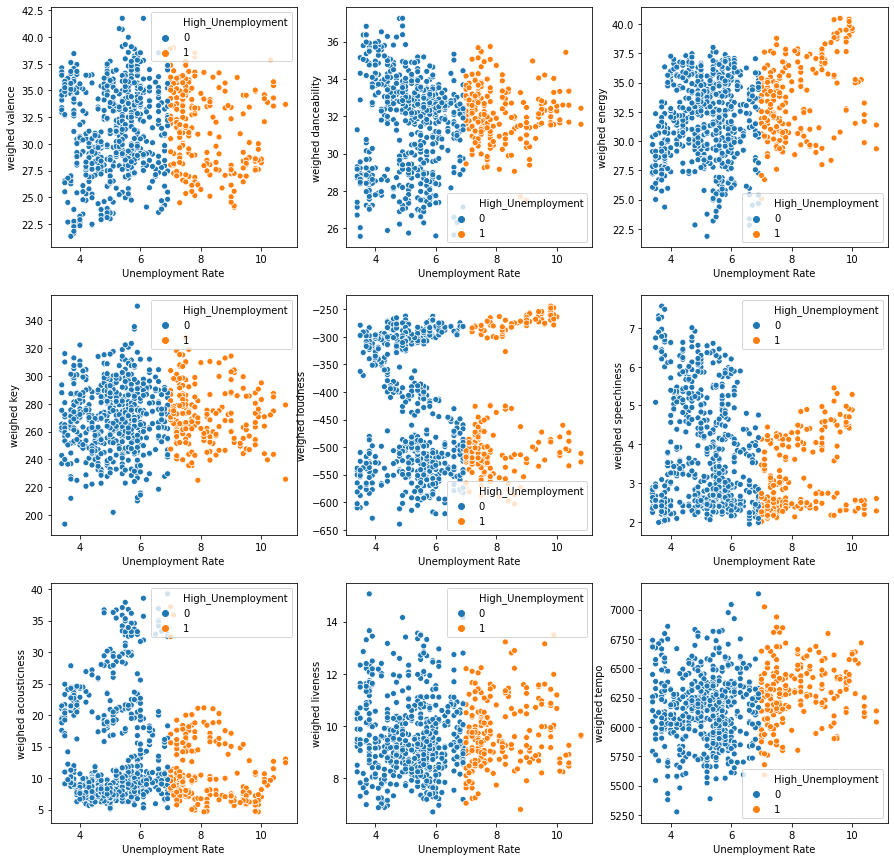

In [36]:
#scatter plots for weigthed feature scroes by unemployment rate
row=0
col=0
fig,axes=plt.subplots(3,3,figsize=(15,15))

for i in feature_list:
    if col>2:
        row+=1
        col=0
        sns.scatterplot(x='Unemployment Rate',y=i,hue='High_Unemployment',data=music_unemployment_group,ax=axes[row][col])
        col+=1
        
    else:
        sns.scatterplot(x='Unemployment Rate',y=i,hue='High_Unemployment',data=music_unemployment_group,ax=axes[row][col])
        col+=1

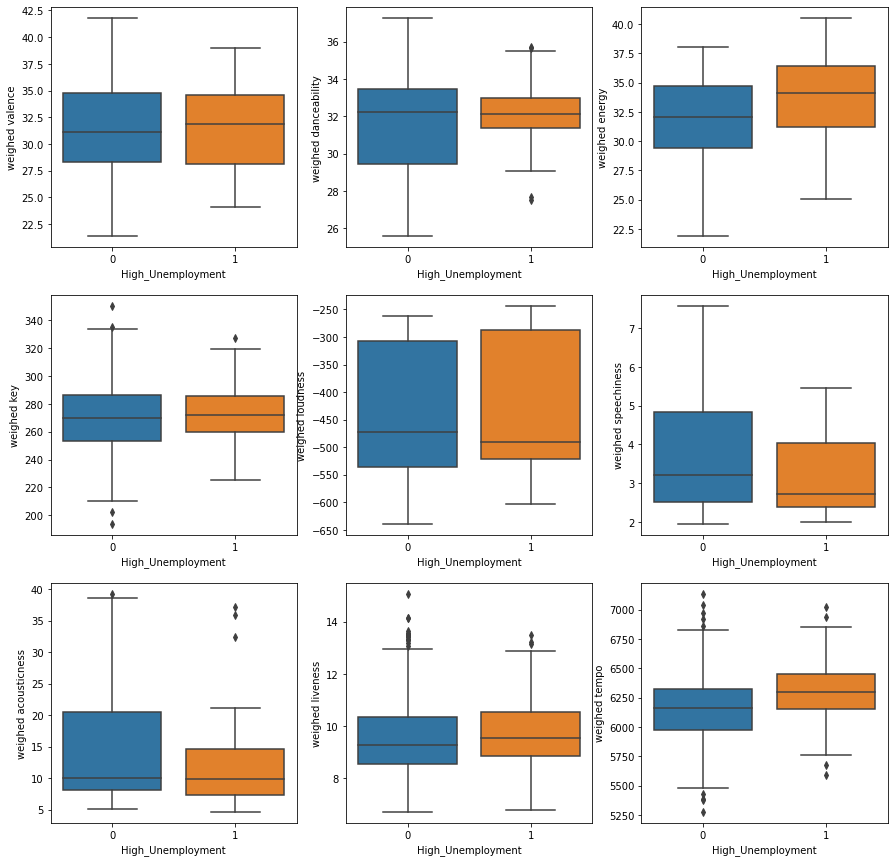

In [37]:
#boxplots for weigthed feature scroes by unemployment rate
row=0
col=0
fig,axes=plt.subplots(3,3,figsize=(15,15))
for i in feature_list:
    if col>2:
        row+=1
        col=0
        sns.boxplot(x='High_Unemployment',y=i,data=music_unemployment_group[[i,'High_Unemployment']],ax=axes[row][col])
        col+=1
        
    else:
        sns.boxplot(x='High_Unemployment',y=i,data=music_unemployment_group[[i,'High_Unemployment']],ax=axes[row][col])
        col+=1
        

In [38]:
#anova test for weighted features
statistic_list=[]
pvalue_list=[]
for i in feature_list:
    group1=music_unemployment_group[i][music_unemployment_group['High_Unemployment']==1]
    group2=music_unemployment_group[i][music_unemployment_group['High_Unemployment']==0]
    statistic=st.f_oneway(group1,group2)[0]
    pvalue=st.f_oneway(group1,group2)[1]
    statistic_list.append(statistic)
    pvalue_list.append(pvalue)
    print(f' ANOVA Result for {i} vs. High_Unemployment\n {st.f_oneway(group1,group2)}\n==================')

 ANOVA Result for weighed valence vs. High_Unemployment
 F_onewayResult(statistic=0.6091276787185066, pvalue=0.43535111808055316)
 ANOVA Result for weighed danceability vs. High_Unemployment
 F_onewayResult(statistic=7.821246307501528, pvalue=0.005289512603634271)
 ANOVA Result for weighed energy vs. High_Unemployment
 F_onewayResult(statistic=61.251125618891464, pvalue=1.619579119455414e-14)
 ANOVA Result for weighed key vs. High_Unemployment
 F_onewayResult(statistic=2.419234766865508, pvalue=0.12025548924813212)
 ANOVA Result for weighed loudness vs. High_Unemployment
 F_onewayResult(statistic=0.13880512422488062, pvalue=0.7095720904864318)
 ANOVA Result for weighed speechiness vs. High_Unemployment
 F_onewayResult(statistic=29.29605238564185, pvalue=8.253160144286531e-08)
 ANOVA Result for weighed acousticness vs. High_Unemployment
 F_onewayResult(statistic=27.99488116080657, pvalue=1.5782314203970076e-07)
 ANOVA Result for weighed liveness vs. High_Unemployment
 F_onewayResult(sta

In [39]:
#anova test results df
significant_list=[1 if i <=0.05 else 0 for i in pvalue_list]
anova=pd.DataFrame({'Feature':feature_list,'Statistic':statistic_list,'Pvalue':pvalue_list,'Significant':significant_list})
anova.sort_values('Pvalue')

,Feature,Statistic,Pvalue,Significant
2,weighed energy,61.251126,1.619579e-14,1
8,weighed tempo,40.852864,2.809608e-10,1
5,weighed speechiness,29.296052,8.253160e-08,1
6,weighed acousticness,27.994881,1.578231e-07,1
1,weighed danceability,7.821246,5.289513e-03,1
3,weighed key,2.419235,1.202555e-01,0
7,weighed liveness,2.315169,1.285190e-01,0
0,weighed valence,0.609128,4.353511e-01,0
4,weighed loudness,0.138805,7.095721e-01,0


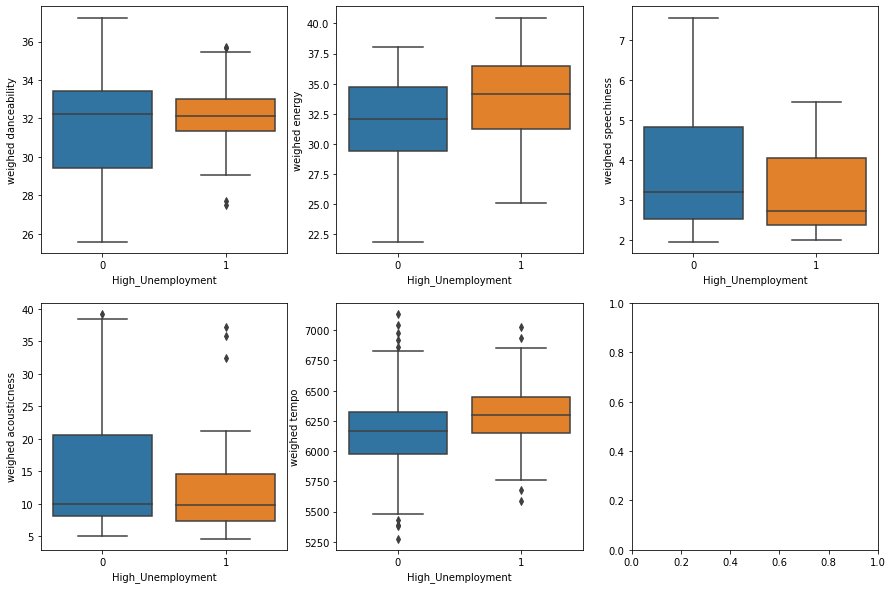

In [40]:
#boxplots for the weighted fetures which has significant 
row=0
col=0
fig,axes=plt.subplots(2,3,figsize=(15,10))
for i in anova['Feature'][anova['Significant']==1]:
    if col>2:
        row+=1
        col=0
        sns.boxplot(x='High_Unemployment',y=i,data=music_unemployment_group[[i,'High_Unemployment']],ax=axes[row][col])
        col+=1
        
    else:
        sns.boxplot(x='High_Unemployment',y=i,data=music_unemployment_group[[i,'High_Unemployment']],ax=axes[row][col])
        col+=1
        

In [41]:
# ANOVA Test on Yearly Base

In [42]:
music_unemployment_group_y=music_unemployment.groupby(['Year'])[
    ['Unemployment Rate',
       'weighed valence', 'weighed danceability', 'weighed energy',
       'weighed key', 'weighed loudness', 'weighed speechiness',
       'weighed acousticness', 'weighed liveness', 'weighed tempo']].mean()
music_unemployment_group_y['High_Unemployment']=music_unemployment_group_y['Unemployment Rate'].apply(lambda x: 1 if x>=high_unemployment_rate else 0)

In [43]:
statistic_list=[]
pvalue_list=[]
for i in feature_list:
    group1=music_unemployment_group_y[i][music_unemployment_group_y['High_Unemployment']==1]
    group2=music_unemployment_group_y[i][music_unemployment_group_y['High_Unemployment']==0]
    statistic=st.f_oneway(group1,group2)[0]
    pvalue=st.f_oneway(group1,group2)[1]
    statistic_list.append(statistic)
    pvalue_list.append(pvalue)
    print(f' ANOVA Result for {i} vs. High_Unemployment\n {st.f_oneway(group1,group2)}\n==================')

 ANOVA Result for weighed valence vs. High_Unemployment
 F_onewayResult(statistic=0.008198136152950683, pvalue=0.9281672508762993)
 ANOVA Result for weighed danceability vs. High_Unemployment
 F_onewayResult(statistic=0.3247819907408893, pvalue=0.570948872812219)
 ANOVA Result for weighed energy vs. High_Unemployment
 F_onewayResult(statistic=5.8552897971328015, pvalue=0.018685219860589446)
 ANOVA Result for weighed key vs. High_Unemployment
 F_onewayResult(statistic=0.11782117844178977, pvalue=0.732650811100787)
 ANOVA Result for weighed loudness vs. High_Unemployment
 F_onewayResult(statistic=0.13106636743752095, pvalue=0.7186446730020518)
 ANOVA Result for weighed speechiness vs. High_Unemployment
 F_onewayResult(statistic=1.5388697801829765, pvalue=0.21978088747701885)
 ANOVA Result for weighed acousticness vs. High_Unemployment
 F_onewayResult(statistic=2.452428481184672, pvalue=0.12278341875598331)
 ANOVA Result for weighed liveness vs. High_Unemployment
 F_onewayResult(statistic

In [44]:
significant_list=[1 if i <=0.05 else 0 for i in pvalue_list]
anova=pd.DataFrame({'Feature':feature_list,'Statistic':statistic_list,'Pvalue':pvalue_list,'Significant':significant_list})
anova.sort_values('Pvalue')

,Feature,Statistic,Pvalue,Significant
8,weighed tempo,9.136888,0.003726,1
2,weighed energy,5.855290,0.018685,1
6,weighed acousticness,2.452428,0.122783,0
5,weighed speechiness,1.538870,0.219781,0
7,weighed liveness,0.502765,0.481128,0
1,weighed danceability,0.324782,0.570949,0
4,weighed loudness,0.131066,0.718645,0
3,weighed key,0.117821,0.732651,0
0,weighed valence,0.008198,0.928167,0


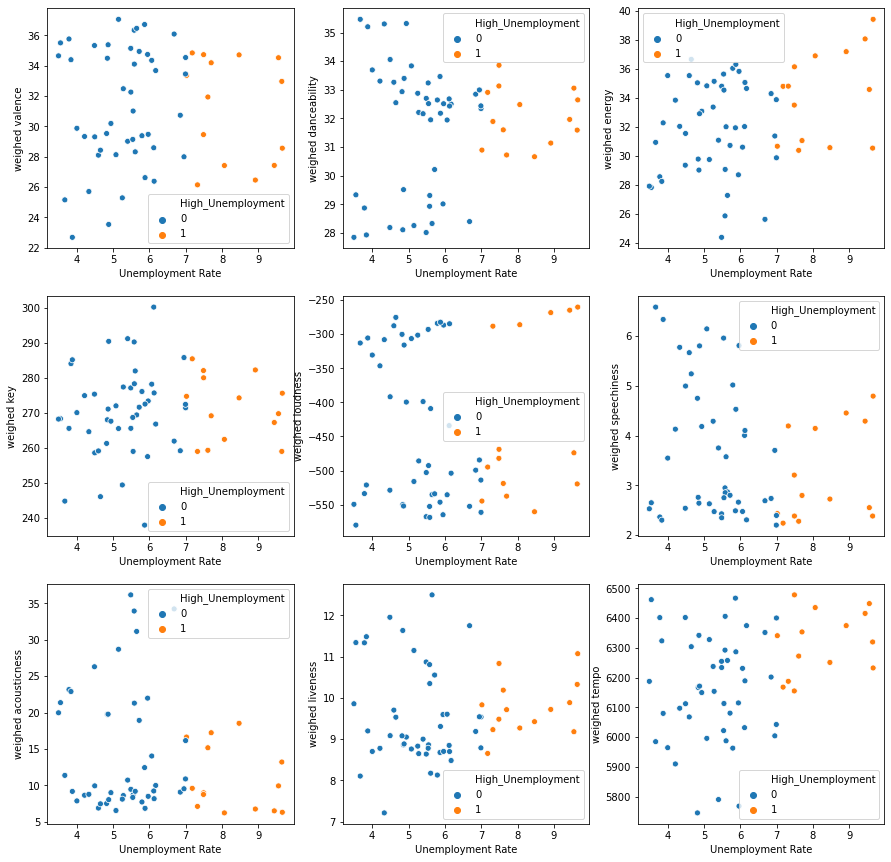

In [45]:
#scatter plots for weigthed feature scroes by unemployment rate
row=0
col=0
fig,axes=plt.subplots(3,3,figsize=(15,15))

for i in feature_list:
    if col>2:
        row+=1
        col=0
        sns.scatterplot(x='Unemployment Rate',y=i,hue='High_Unemployment',data=music_unemployment_group_y,ax=axes[row][col])
        col+=1
        
    else:
        sns.scatterplot(x='Unemployment Rate',y=i,hue='High_Unemployment',data=music_unemployment_group_y,ax=axes[row][col])
        col+=1

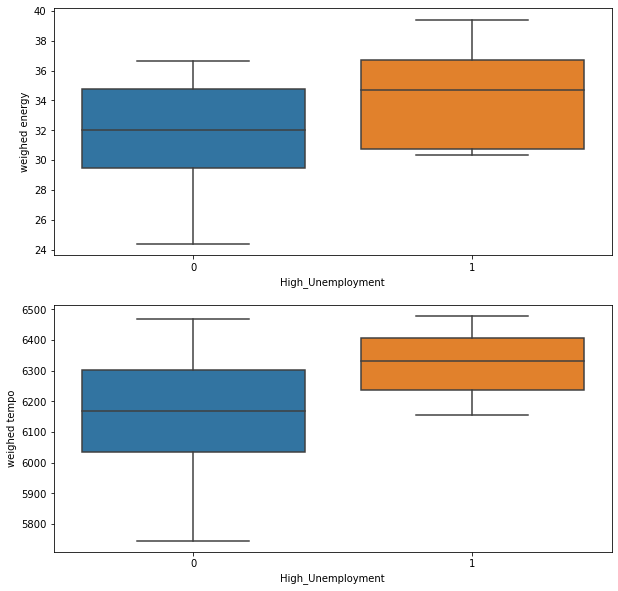

In [46]:
n=0
fig,axes=plt.subplots(2,1,figsize=(10,10))
for i in anova['Feature'][anova['Significant']==1]:
    sns.boxplot(x='High_Unemployment',y=i,data=music_unemployment_group_y[[i,'High_Unemployment']],ax=axes[n])
    n+=1
        

## Unemployment Rate vs. Tempo

From the ANOVA test, we knew that energy and tempo may correlate with the unemployment rate.

We ran a regression for the unemployment rate versus tempo and discovered there is a slight negative relationship between tempo in a song and the unemployment rate

In [47]:
music_unemployment["weighed energy"] = music_unemployment["energy"] * (101 - music_unemployment["Placement"])

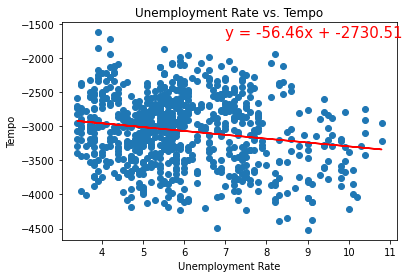

In [48]:
#Create a weighed tempo
music_unemployment["weighed tempo"] = music_unemployment["tempo"] * (101 - music_unemployment["tempo"])

# Group by the song's date
music_unemployment_gb = music_unemployment.groupby(["Year", "Month", "Day"])

# Find the average of unemployment rate and weighed valence for each date
rate_v_tempo = music_unemployment_gb.mean()[["Unemployment Rate", "weighed tempo"]]

# Create a Scatter Graph
x_values = rate_v_tempo["Unemployment Rate"]
y_values = rate_v_tempo["weighed tempo"]
linearplt(rate_v_tempo, x_values, y_values, "Tempo", (7,-1700))
plt.title("Unemployment Rate vs. Tempo")
plt.show()


Knowing that we might want to use this to predict what the next big hit by be, we decided to look at songs since 2010, because music has changed a lot from 1960 and on.

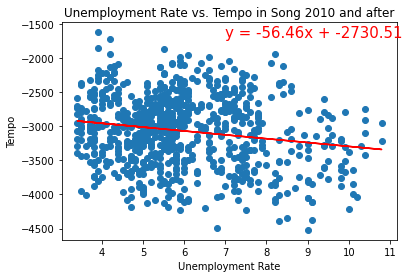

In [49]:
# Find the data for songs 2010 and after
music_unemployment_years = (music_unemployment.loc[(music_unemployment["Year"]) >= 2010])
music_unemployment_years

# Group by the song's date
music_unemployment_years_gb = music_unemployment_years.groupby(["Year", "Month", "Day"])

# Find the average of unemployment rate and weighed valence for each date
two_rate_v_tempo = music_unemployment_years_gb.mean()[["Unemployment Rate", "weighed tempo"]]

# Create a Scatter Graph
x_values = rate_v_tempo["Unemployment Rate"]
y_values = rate_v_tempo["weighed tempo"]
linearplt(rate_v_tempo, x_values, y_values, "Tempo", (7,-1700))
plt.title("Unemployment Rate vs. Tempo in Song 2010 and after")
plt.show()


## Unemployment Rate vs. Energy

We ran a regression for the unemployment rate versus energy and discovered there is a positive relationship between the energy in a song and the unemployment rate.

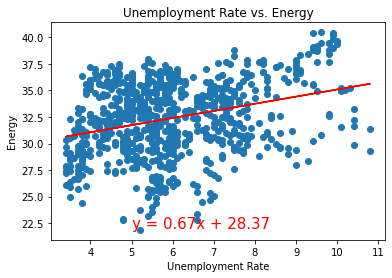

In [50]:
#Create a weighed energy
music_unemployment["weighed energy"] = music_unemployment["energy"] * (101 - music_unemployment["Placement"])

# Group by the song's date
music_unemployment_gb = music_unemployment.groupby(["Year", "Month", "Day"])

# Find the average of unemployment rate and weighed valence for each date
rate_v_energy = music_unemployment_gb.mean()[["Unemployment Rate", "weighed energy"]]

# Create a Scatter Graph
x_values = rate_v_energy["Unemployment Rate"]
y_values = rate_v_energy["weighed energy"]
linearplt(rate_v_energy, x_values, y_values, "Energy", (5,22))
plt.title("Unemployment Rate vs. Energy")
plt.show()


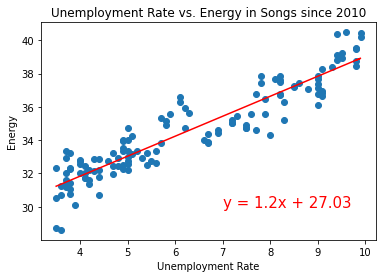

In [51]:
# Find the data for songs 2010 and after
music_unemployment_years = (music_unemployment.loc[(music_unemployment["Year"]) >= 2010])
music_unemployment_years
                                  
# Group by the song's date
music_unemployment_years_gb = music_unemployment_years.groupby(["Year", "Month", "Day"])

# Find the average of unemployment rate and weighed valence for each date
two_rate_v_energy = music_unemployment_years_gb.mean()[["Unemployment Rate", "weighed energy"]]

# Create a Scatter Graph
x_values = two_rate_v_energy["Unemployment Rate"]
y_values = two_rate_v_energy["weighed energy"]
linearplt(two_rate_v_energy, x_values, y_values, "Energy", (7,30))
plt.title("Unemployment Rate vs. Energy in Songs since 2010")
plt.show()


## Conclusion

Happiness in a song did not have a strong correlation with the U.S. Employment Rate. However, we did discover that energy does have a correlation. When there is a high unemployment rate in the U.S., the top billboard songs are more likely to have higher energy than when there is a low unemployment rate.

This is not great news for Taylor Swift's new album "folklore" that came out last week.